In [42]:
import pandas as pd

data = pd.read_csv('Annotated_data.csv')

#print the size of the data
print(data.shape)
data.head()


(2530, 5)


,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [43]:
data.sort_values('Id_Number', inplace=True)
data.drop_duplicates(subset='Id_Number', keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)
data.head()

(2530, 5)


,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,0,From a teen in Australia: This story is incred...,We grew close quickly and for some reason I ju...,Emotional Reasoning,NaN
1,1,From a woman in the U.S.: My Therapist of eigh...,She knew I think and I believe she felt betray...,Mind Reading,NaN
2,2,I don’t even really know where to start. For t...,For the past 7 months I’ve been under extreme ...,Overgeneralization,Emotional Reasoning
3,3,"From a woman in the UK: Hi, I have a 4 month o...",I’m worried about disruption to our relationsh...,Fortune-telling,NaN
4,4,Me and my sister in law are both pregnant righ...,And they are always all over my sister in laws...,Mental filter,NaN


In [44]:
print(f'{data["Dominant Distortion"].unique().size} Dominant Distortions: {data["Dominant Distortion"].unique().__array__().tolist()}')
print(f'{data["Secondary Distortion (Optional)"].unique().size} Secondary Distortions: {data["Secondary Distortion (Optional)"].unique().__array__().tolist()}')

11 Dominant Distortions: ['Emotional Reasoning', 'Mind Reading', 'Overgeneralization', 'Fortune-telling', 'Mental filter', 'No Distortion', 'Magnification', 'Should statements', 'Personalization', 'All-or-nothing thinking', 'Labeling']
11 Secondary Distortions: [nan, 'Emotional Reasoning', 'Fortune-telling', 'Overgeneralization', 'Labeling', 'All-or-nothing thinking', 'Mind Reading', 'Magnification', 'Mental filter', 'Should statements', 'Personalization']


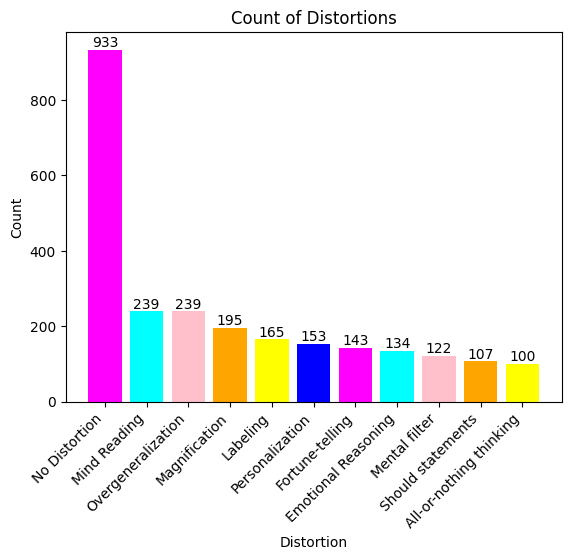

In [45]:
import matplotlib.pyplot as plt

distortion_counts = data['Dominant Distortion'].value_counts()

colors=['magenta', 'cyan', 'pink', 'orange', 'yellow', 'blue']

plt.bar(distortion_counts.index, distortion_counts.values, color=colors)
plt.xlabel('Distortion')
plt.ylabel('Count')
plt.title('Count of Distortions')

# Add value labels to each bar
for i, v in enumerate(distortion_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()


In [48]:
import nltk

data['num_of_characters'] = data['Patient Question'].apply(lambda x:len(x))  #compute the length of characters and add new column

data['num_of_words'] = data['Patient Question'].apply(lambda x: len(nltk.word_tokenize(x))) # counting the number of words in each text and adding it as a column.

data['num_of_sentences'] = data['Patient Question'].apply(lambda x: len(nltk.sent_tokenize(x))) # counting the number of sentences in each text and adding it as a column.

data[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

print(data.head())

   Id_Number                                   Patient Question  \
0          0  From a teen in Australia: This story is incred...   
1          1  From a woman in the U.S.: My Therapist of eigh...   
2          2  I don’t even really know where to start. For t...   
3          3  From a woman in the UK: Hi, I have a 4 month o...   
4          4  Me and my sister in law are both pregnant righ...   

                                      Distorted part  Dominant Distortion  \
0  We grew close quickly and for some reason I ju...  Emotional Reasoning   
1  She knew I think and I believe she felt betray...         Mind Reading   
2  For the past 7 months I’ve been under extreme ...   Overgeneralization   
3  I’m worried about disruption to our relationsh...      Fortune-telling   
4  And they are always all over my sister in laws...        Mental filter   

  Secondary Distortion (Optional)  num_of_characters  num_of_words  \
0                             NaN                502           1

In [49]:
data[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,2530.000000,2530.00000,2530.000000
mean,869.805138,194.08498,9.301581
std,593.128039,132.60900,7.181566
min,161.000000,32.00000,1.000000
25%,424.250000,95.00000,4.000000
50%,654.000000,147.00000,7.000000
75%,1159.000000,256.00000,12.000000
max,5657.000000,1299.00000,83.000000


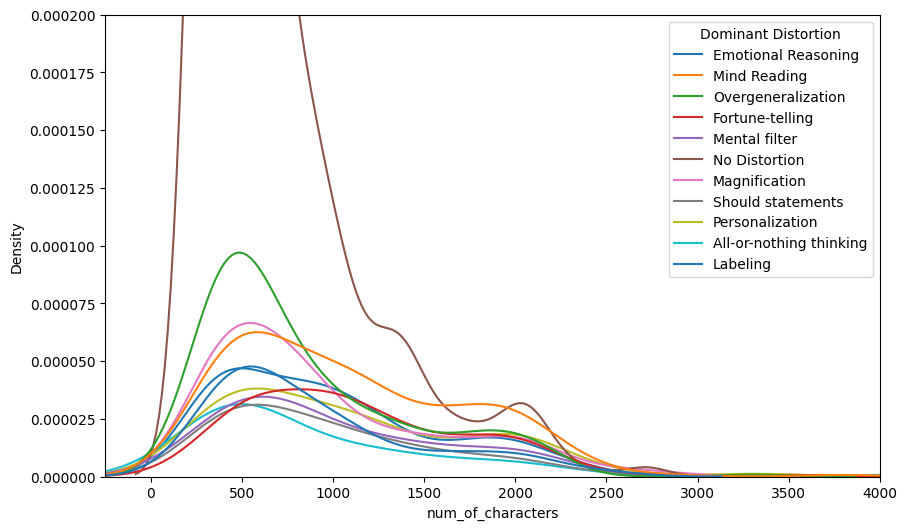

In [50]:
import seaborn as sns

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x=data['num_of_characters'], hue=data['Dominant Distortion'], palette='tab10')
plt.xlim(-250, 4000)
plt.ylim(0, 0.0002)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def train_test_model(vectorizer, model):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

    # Preprocess the text data and vectorize using the provided vectorizer
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test_vectorized)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"F1-score: {f1}")
    return f1


In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# GaussianNB(), MLPClassifier(),

# Create a list of vectorizers to test
vectorizers = [CountVectorizer(), TfidfVectorizer(), HashingVectorizer()]

# Create a list of models to test
models = [MultinomialNB(), BernoulliNB(), LogisticRegression(), SGDClassifier(), SVC(), LinearSVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
          KNeighborsClassifier(), GradientBoostingClassifier()]

# Array to store results
results = []
result = 0

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model(vectorizer, model)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        results.append([vectorizer.__class__.__name__, model.__class__.__name__, result])



Using CountVectorizer:


Using MultinomialNB:
F1-score: 0.23267131578505543

Using BernoulliNB:
F1-score: 0.23993606026041833

Using LogisticRegression:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score: 0.3080293442557655

Using SGDClassifier:
F1-score: 0.2760842089717307

Using SVC:
F1-score: 0.22001747015931886

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score: 0.290729874277918

Using DecisionTreeClassifier:
F1-score: 0.28032118358239005

Using RandomForestClassifier:
F1-score: 0.2244335735532735

Using AdaBoostClassifier:
F1-score: 0.26313418431412405

Using GradientBoostingClassifier:
F1-score: 0.2633742353880496

Using KNeighborsClassifier:
F1-score: 0.24811047623571938


Using TfidfVectorizer:


Using MultinomialNB:
F1-score: 0.19576943537177605

Using BernoulliNB:
F1-score: 0.23993606026041833

Using LogisticRegression:
F1-score: 0.257028197072088

Using SGDClassifier:
F1-score: 0.2994668647847397

Using SVC:
F1-score: 0.20872839706513047

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.32008059671716466

Using DecisionTreeClassifier:
F1-score: 0.22897056713858108

Using RandomForestClassifier:
F1-score: 0.21764406555635843

Using AdaBoostClassifier:
F1-score: 0.2357456243412997

Using GradientBoostingClassifier:
F1-score: 0.25777808582625666

Using KNeighborsClassifier:
F1-score: 0.20360823124189018


Using HashingVectorizer:


Using MultinomialNB:
Failed

Using BernoulliNB:
F1-score: 0.19576943537177605

Using LogisticRegression:
F1-score: 0.251836518889811

Using SGDClassifier:
F1-score: 0.3089219056983307

Using SVC:
F1-score: 0.20508144787105106

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.3084140773049409

Using DecisionTreeClassifier:
F1-score: 0.2565543777354228

Using RandomForestClassifier:
F1-score: 0.20510683754483952

Using AdaBoostClassifier:
F1-score: 0.21604661370333247

Using GradientBoostingClassifier:
Failed

Using KNeighborsClassifier:
F1-score: 0.23284525180491839


C:\Users\meaps\AppData\Local\Temp\ipykernel_27652\2763012943.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()
C:\Users\meaps\AppData\Local\Temp\ipykernel_27652\2763012943.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDF = resultsDF.append(average_scores)


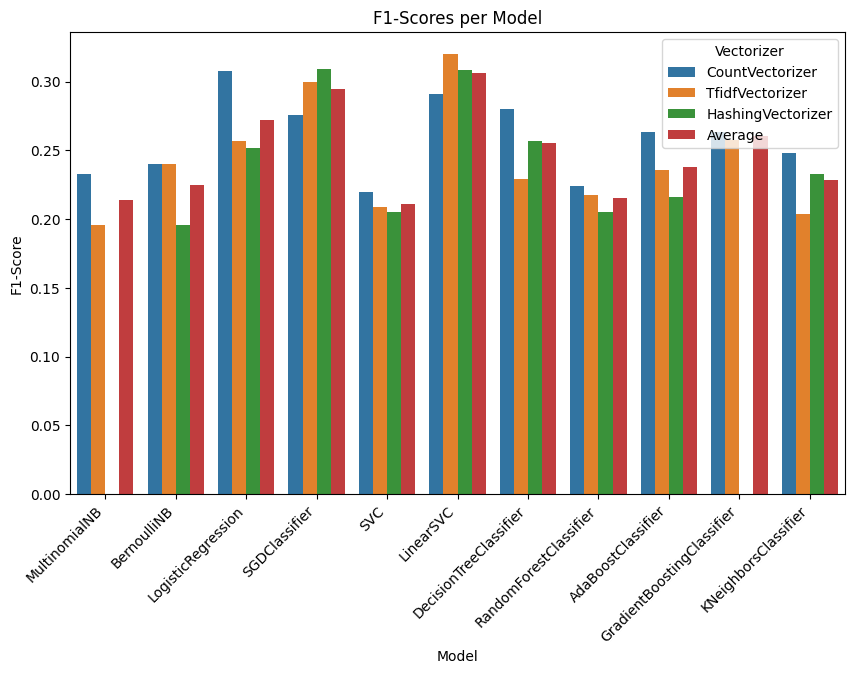

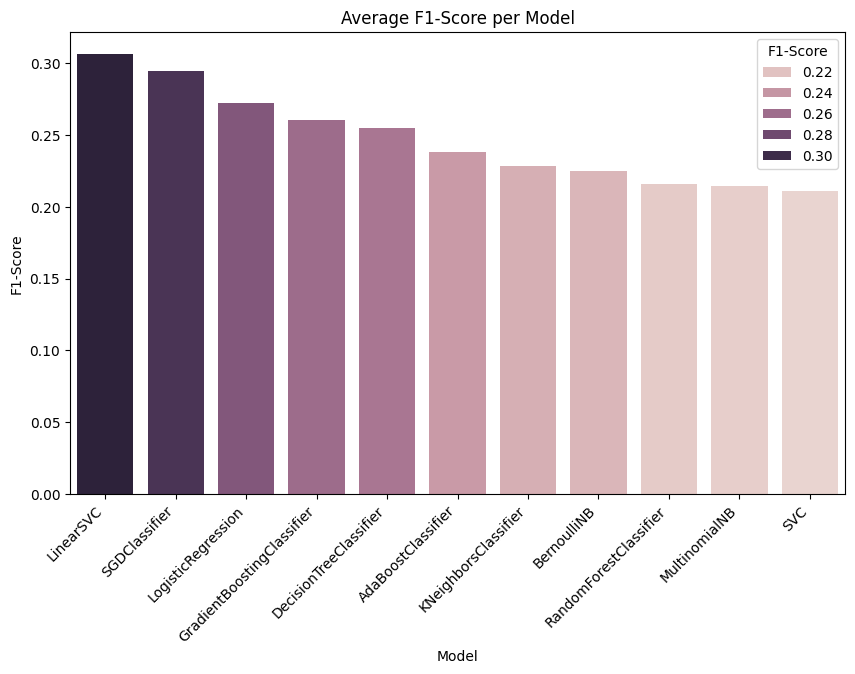

In [55]:
# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model')
plt.show()

# Sort and plot the Average F1-Score for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='F1-Score', data=average_scores.sort_values('F1-Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Average F1-Score per Model')
plt.show()


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.32008059671716466
[[  0   2   2   4   1  14   5   1   4   0   3]
 [  1  12   5   2   3  23   1   0   1   1   0]
 [  0   4   7   0   1  28   3   1   2   1   1]
 [  0   3   1   3   3  12   0   1   0   1   1]
 [  1   1   1   0   1   9   1   0   0   0   3]
 [  1   5   5   1   1 160   4   1   1   1   5]
 [  0   5   4   1   2  20   5   0   3   2   1]
 [  1   2   2   1   1   4   2   3   2   0   0]
 [  0   1   2   2   3  16   2   0   4   0   0]
 [  1   2   5   1   2  10   1   0   1   0   0]
 [  1   0   5   1   0  22   0   1   0   0   2]]


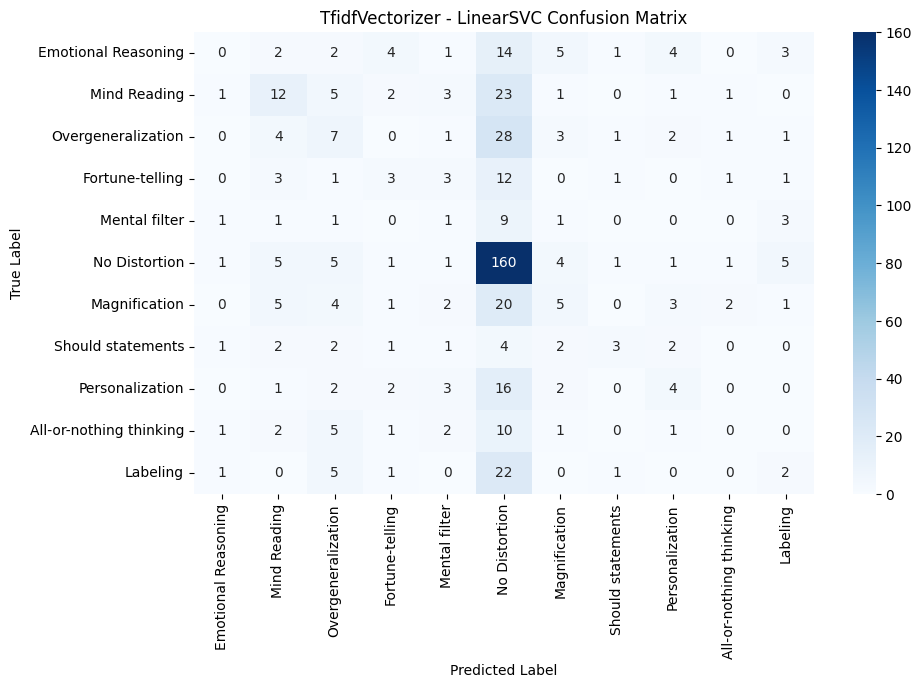

In [60]:
from sklearn.metrics import confusion_matrix
# Sort the resultsDF by F1-Score in descending order
best_combination = resultsDF.sort_values('F1-Score', ascending=False).iloc[0]

# Get the best vectorizer and model
best_vectorizer = best_combination['Vectorizer']
best_model = best_combination['Model']

# Create the vectorizer and model objects
vectorizer = eval(best_vectorizer)()
model = eval(best_model)()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

# Find the labels for the confusion matrix
labels = data['Dominant Distortion'].unique()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(best_combination['Vectorizer'] + ' - ' + best_combination['Model'] + ' Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()